<a href="https://colab.research.google.com/github/Jorayala/Colab/blob/master/Semana4Taller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Banner_MLS_3.png](attachment:Banner_MLS_3.png)
# Taller 4. Selección de modelos
***MLS. Machine learning supervisado***
<br>***Semana 4, Taller:*** *Selección de modelo y regularización*
<br> **Profesor:** *Fernando Lozano* - **Autor Notebook:** *Mónica Gantiva*



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Introducción
### Descripción
Este *jupyter notebook* contiene el material necesario para el desarrollo del Taller calificable de la Semana 4 del curso *MLS: Machine learning supervisado*. En esta tarea usted deberá solucionar un problema de clasificación binaria aplicando varios modelos y seleccionando el más conveniente.

#### Objetivos de Aprendizaje
<br>Identificar overfitting y underfitting en un modelo de aprendizaje supervisado.
<br>Seleccionar apropiadamente la complejidad de un modelo en aprendizaje supervisado.


### Metodología
En este taller se abordará un poblema aplicado de clasificación binaria para el cual usted deberá tomar dos modelos de machine learning propuestos y mejorar su desempeño. Para ello emplee las celdas que tienen la siguiente notación.

In [ ]:
# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

Así mismo, usted deberá análizar los resultados obtenidos para cada modelo. Para ello, responda las preguntas que se presentarán durante el taller. Dispondra de celdas con la siguiente notación para escribir su análisis:

***Respuesta:***

### Problema aplicado: clasificación de reservas de un hotel


En la industria hotelera es deseable estimar si un cliente cumplirá con la reservación previamente hecha. En este caso, se tiene una base de datos con la información del comportamiento de clientes que han realizado reservaciones en un hotel y el cumplimiento o cancelación de dicha reserva. En esta actividad se implementarán árboles de decisión y random forest para  predecir si un cliente cancelará o no su reserva y clasificar el estado de su reserva según el comportamiento que presente. La base de datos usada ha sido tomada de [1]
![imagen.PNG](attachment:imagen.PNG)

 Imagen tomada de [2]


***referencias***
<br>[1]https://www.kaggle.com/datasets/gauravduttakiit/reservation-cancellation-prediction
<br>[2]https://pixabay.com/es/photos/hotel-habitaci%C3%B3n-nuevo-producto-1330850/

#### Inicialización


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

#### Cargamos los datos

In [9]:
datos_train = pd.read_csv('/content/drive/MyDrive/ML Supervisado/train.csv')
datos_train.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [10]:
# prompt: Using dataframe datos_train: columns and files number

# Display the number of columns
print("Number of columns:", datos_train.shape[1])

# Display the number of rows
print("Number of rows:", datos_train.shape[0])


Number of columns: 19
Number of rows: 42100


Podemos ver que el archivo contiene los diferentes atributos de los detalles de la reserva de los clientes. El diccionario de datos detallado se proporciona a continuación.

* no_of_adults: Número de adultos
* no_of_children Número de niños
* no_of_weekend_nights: Número de noches de fin de semana (sábado o domingo) que el huésped se hospedó o reservó para quedarse en el hotel
* no_of_week_nights: Número de noches de la semana (lunes a viernes) que el huésped se hospedó o reservó para quedarse en el hotel
* type_of_meal_plan: Tipo de plan de comidas reservado por el cliente:
* required_car_parking_space: ¿Necesita el cliente una plaza de aparcamiento? (0 - No, 1 - Sí)
* room_type_reservated: Tipo de habitación reservada por el cliente. Los valores son cifrados (codificados) por INN Hotels.
* lead_time: Número de días entre la fecha de reserva y la fecha de llegada
* arrival_year: año de la fecha de llegada
* arrival_month: Mes de la fecha de llegada
* arrival_date: Fecha del mes
* market_segment_type: Designación del segmento de mercado.
* repeated_guest: ¿El cliente es un invitado repetido? (0 - No, 1 - Sí)
* no_of_previous_cancellations: número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual
* no_of_previous_bookings_not_canceled: Número de reservas anteriores no canceladas por el cliente antes de la reserva actual
* avg_price_per_room: Precio medio por día de la reserva; Los precios de las habitaciones son dinámicos. (en euros)
* no_of_special_requests: número total de solicitudes especiales realizadas por el cliente (por ejemplo, piso alto, vista desde la habitación, etc.)
* booking_status: Bandera que indica si la reserva fue cancelada o no.

La última columna corresponde al estado de la reserva, siendo 0 para cancelado y 1 para cumplimiento de la reserva. Esta es nuestra variable objetivo. Procedemos a separar las variables de predicción y la objetivo y los conjuntos de entrenamiento y prueba

#### Separación de datos
Ahora se tomarán los datos correspondientes a las variables independiente y dependientes. Así mismo, se realiza la separa de los datos en el conjunto de entrenamiento y prueba

In [11]:
X_train = datos_train.drop('booking_status',axis=1)
y_train =datos_train['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### Modelo 1: Arbol de decisión
Ahora se muestra un ejemplo de cómo aplicar un modelo de árbol de decisión para realizar la clasificación deseada. Observe que se crea el modelo, se hace el entrenamiento y se evalúa el desempeño del modelo para el conjunto de entrenamiento y prueba. Por último, se obtiene la matríz de confusión del modelo.


El accuracy de entrenamiento es: 1.0
El accuracy prueba es: 0.7481235154394299


Text(50.722222222222214, 0.5, 'Verdad')

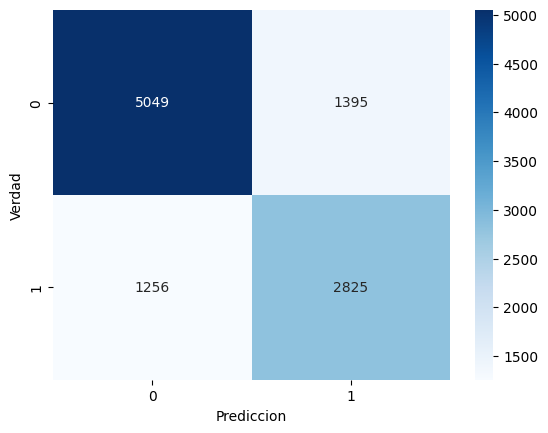

In [12]:
#creación del modelo
d_tree=DecisionTreeClassifier(max_depth=40)

#Entrenamiento del modelo
d_tree.fit(X_train, y_train)

#Predicción de los datos de entrenamiento
y_pred_train=d_tree.predict(X_train)

#Métricas de desempeño
accuaracy_train=accuracy_score(y_train, y_pred_train)
print (f"El accuracy de entrenamiento es: {accuaracy_train}")

#Predicción de los datos de prueba
y_pred_ds=d_tree.predict(X_test)

#Métricas de desempeño
accuaracy_ds=accuracy_score(y_test, y_pred_ds)
print (f"El accuracy prueba es: {accuaracy_ds}")

sns.heatmap(confusion_matrix(y_test, y_pred_ds),annot=True,fmt='g',cmap='Blues')
plt.xlabel('Prediccion')
plt.ylabel('Verdad')

Tomando como guía el ejemplo anterior, modifique parámetros como la profundidad del árbol de decisión. Varíe este parámetro al menos 4 veces entre los valores de 1 a 40. Para este punto debe mostrar el desempeño para cada caso. Tengan en cuenta como cambia el accuracy de entrenamiento y prueba para cada caso y el comportamiento de la matriz confusión.

Profundidad del árbol: 1
El accuracy de entrenamiento es: 0.7164528899445765
El accuracy prueba es: 0.723895486935867


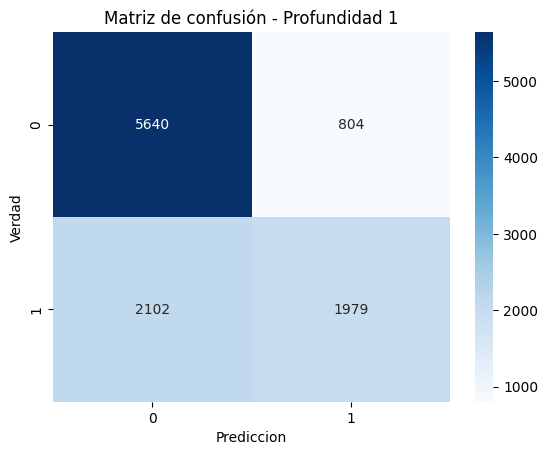

Profundidad del árbol: 10
El accuracy de entrenamiento es: 0.8301821060965954
El accuracy prueba es: 0.8034204275534442


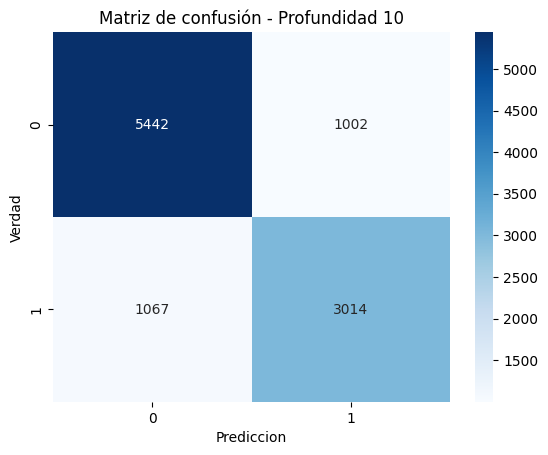

Profundidad del árbol: 20
El accuracy de entrenamiento es: 0.9547743467933492
El accuracy prueba es: 0.7642755344418052


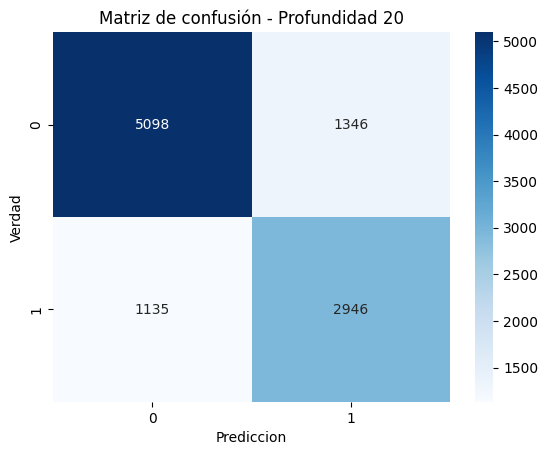

Profundidad del árbol: 30
El accuracy de entrenamiento es: 0.9967379255740301
El accuracy prueba es: 0.7493586698337292


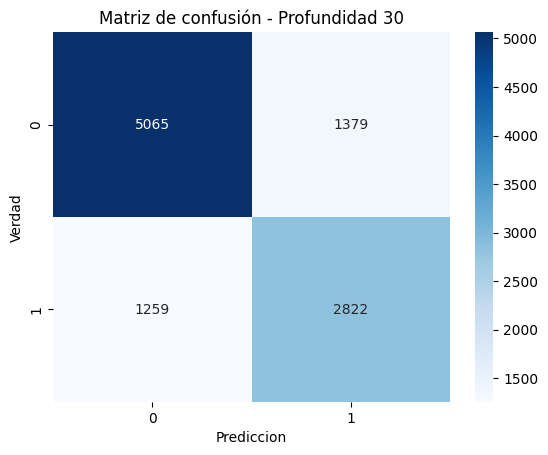

Profundidad del árbol: 40
El accuracy de entrenamiento es: 1.0
El accuracy prueba es: 0.7454631828978623


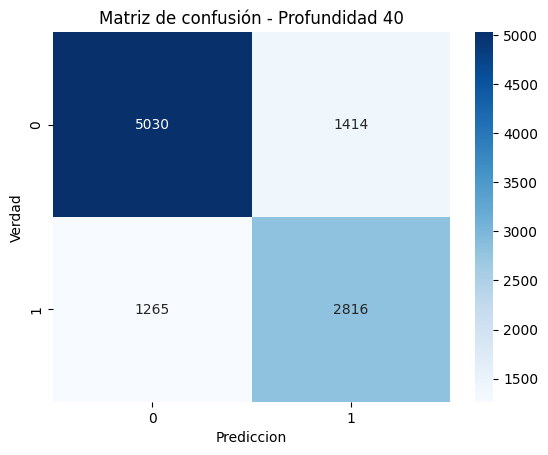

In [13]:
# =====================================================
# COMPLETAR ===========================================
#
# Modificación del parámetro de profundidad del árbol de decisión
depths = [1, 10, 20, 30, 40]
for depth in depths:
    print(f"Profundidad del árbol: {depth}")

    # Creación del modelo con la profundidad específica
    d_tree = DecisionTreeClassifier(max_depth=depth)

    # Entrenamiento del modelo
    d_tree.fit(X_train, y_train)

    # Predicción de los datos de entrenamiento
    y_pred_train = d_tree.predict(X_train)

    # Métricas de desempeño en entrenamiento
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print(f"El accuracy de entrenamiento es: {accuracy_train}")

    # Predicción de los datos de prueba
    y_pred_ds = d_tree.predict(X_test)

    # Métricas de desempeño en prueba
    accuracy_ds = accuracy_score(y_test, y_pred_ds)
    print(f"El accuracy prueba es: {accuracy_ds}")

    # Matriz de confusión
    sns.heatmap(confusion_matrix(y_test, y_pred_ds), annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Prediccion')
    plt.ylabel('Verdad')
    plt.title(f'Matriz de confusión - Profundidad {depth}')
    plt.show()


# =====================================================

Responda la siguientes preguntas:
1. ¿Cómo afecta la variación de estos parámetros en el desempeño del modelo? Justifique su respuesta
2. ¿Observa sobreajuste en algunos de los modelos? Justifique su respuesta
3. De las variaciones que aplicó el modelo de Arbol de desición ¿Cuál fué el modelo con mejor desempeño?

1- ¿Cómo afecta la variación de estos parámetros en el desempeño del modelo? Justifique su respuesta: La variacion de la profundidad afecta el accuracy de entrenamiento y de prueba. Cuando la profundidad es baja (1 a 10) el modelo es mas simple, es decir no consigue reflejar la complejidad de los datos, posible underfiting, por tanto su desempeno es bajo. Cuando la profundidad es mas alta puede pasar lo contrario, refleja mas complejidad, su accuracy aumenta pero puede haber riesgo de overfitting.

2- ¿Observa sobreajuste en algunos de los modelos? Justifique su respuesta: Es posible, en los modelos de mayor profundidad. La regla de oro es si el accuracy de entrenamiento es mucho mayor que el accuracy de prueba. En el modelo de profundidad 40 empieza a verse la tendencia.

3- De las variaciones que aplicó al modelo de Árbol de decisión ¿Cuál fue el modelo con mejor desempeño? Siguiendo lo anteriormente explicado, el modelo de profundidad 10 seria el que tiene el mejor desempeno pues su accuracy de entrenamiento es similar al de prueba, y el nivel del accuracy esta por encima del 80%.

***RESPUESTAS***

### Modelo 2: Regresión logística

Ahora se muestra un ejemplo de cómo aplicar un modelo de regresión logística para realizar la clasificación deseada. Observe que se crea el modelo, se hace el entrenamiento y se evalúa el desempeño del modelo para el conjunto de entrenamiento y prueba. Por último, se obtiene la matríz de confusión del modelo.

El accuracy de entrenamiento es: 0.7218368962787015
El accuracy de prueba es: 0.7282660332541567


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(50.722222222222214, 0.5, 'Verdad')

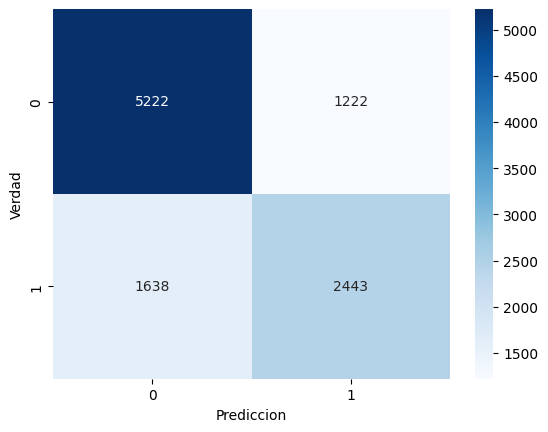

In [14]:

# Crear el modelo
model = LogisticRegression()

#Entrenamiento del modelo
model.fit(X_train, y_train)

#Predicción de los datos de entrenamiento
y_pred_train=model.predict(X_train)

#Métricas de desempeño
accuaracy_train=accuracy_score(y_train, y_pred_train)
print (f"El accuracy de entrenamiento es: {accuaracy_train}")


#Predicción de los datos de prueba
y_pred_ds=model.predict(X_test)

#Métricas de desempeño
accuaracy_prueba=accuracy_score(y_test, y_pred_ds)
print (f"El accuracy de prueba es: {accuaracy_prueba}")

sns.heatmap(confusion_matrix(y_test, y_pred_ds),annot=True,fmt='g',cmap='Blues')
plt.xlabel('Prediccion')
plt.ylabel('Verdad')



Tomando como guía el ejemplo anterior, aplique el parámetro de regularización C al modelo de regresión lodística. Varíe este parámetro al menos 4 veces entre los valores de 0.01 a 100. Para este punto debe mostrar el desempeño para cada caso. Tengan en cuenta como cambia el accuracy de entrenamiento y prueba para cada caso y el comportamiento de la matriz confusión.

Valor de C: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El accuracy de entrenamiento es: 0.7212351543942993
El accuracy prueba es: 0.7276009501187648


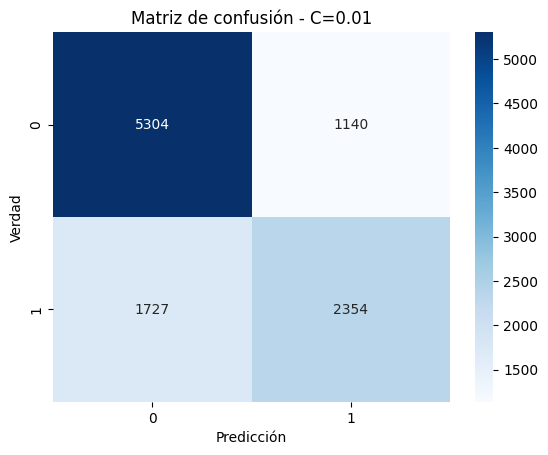

Valor de C: 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El accuracy de entrenamiento es: 0.7212034837688044
El accuracy prueba es: 0.727790973871734


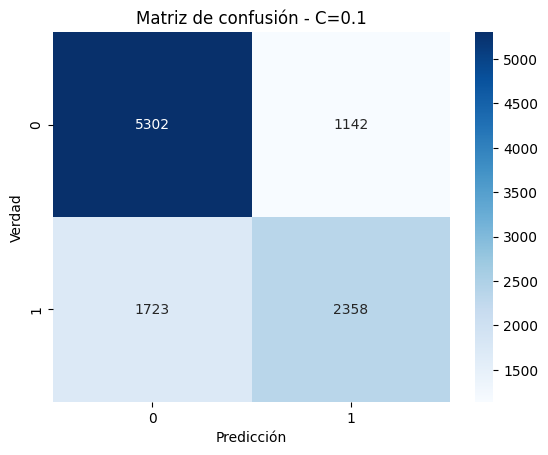

Valor de C: 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El accuracy de entrenamiento es: 0.7218368962787015
El accuracy prueba es: 0.7282660332541567


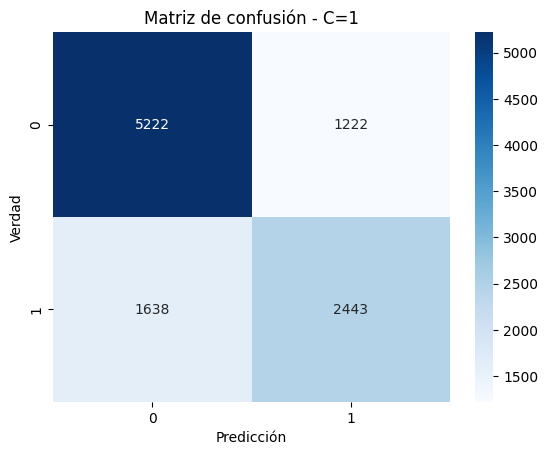

Valor de C: 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El accuracy de entrenamiento es: 0.7358353127474268
El accuracy prueba es: 0.7402375296912114


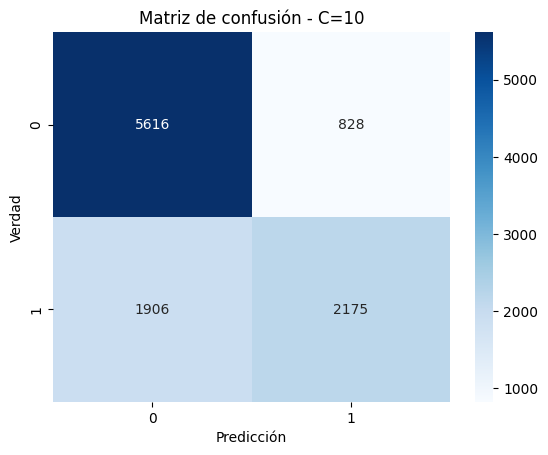

Valor de C: 100


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El accuracy de entrenamiento es: 0.7220902612826603
El accuracy prueba es: 0.7279809976247031


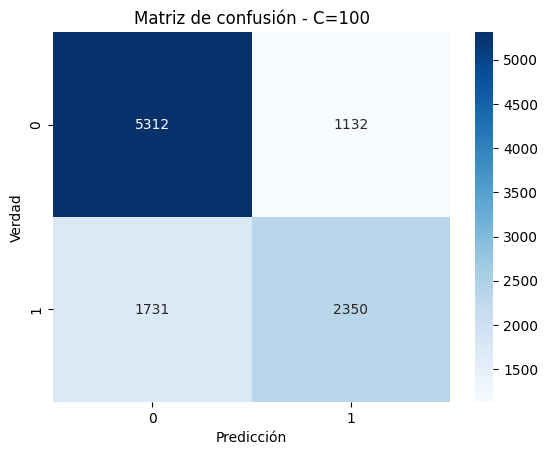

In [15]:
# =====================================================
# COMPLETAR ===========================================
#
# Modificación del parámetro de regularización C
Cs = [0.01, 0.1, 1, 10, 100]
for C_value in Cs:
    print(f"Valor de C: {C_value}")

    # Crear el modelo con el valor de C específico
    model = LogisticRegression(C=C_value)

    # Entrenamiento del modelo
    model.fit(X_train, y_train)

    # Predicción de los datos de entrenamiento
    y_pred_train = model.predict(X_train)

    # Métricas de desempeño en entrenamiento
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print(f"El accuracy de entrenamiento es: {accuracy_train}")

    # Predicción de los datos de prueba
    y_pred_ds = model.predict(X_test)

    # Métricas de desempeño en prueba
    accuracy_prueba = accuracy_score(y_test, y_pred_ds)
    print(f"El accuracy prueba es: {accuracy_prueba}")

    # Matriz de confusión
    sns.heatmap(confusion_matrix(y_test, y_pred_ds), annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicción')
    plt.ylabel('Verdad')
    plt.title(f'Matriz de confusión - C={C_value}')
    plt.show()

# =====================================================

Responda la siguientes preguntas:

1. ¿Cómo afecta la variación de estos parámetros en el desempeño del modelo? Justifique su respuesta: La variacion del parametro de regularizacion C afecta la penalizacion aplicada a los coeficientes del modelo. Un valor de C bajo implica una penalizacion mas fuerte, lo que lleva a un modelo mas simple y al ya explicado underfitting, lo que conlleva a bajo accuracy tanto en entrenamiento como en prueba. Por otro lado un valor alto de C (por ejemplo 100), reduce la regularizacion y permite que el modelo se ajuste mejor a los datos, aunque puede aumentar riesgo de overfitting.
2. ¿Observa sobreajuste en algunos de los modelos? Justifique su respuesta No observo sobreajuste en ningun modelo, basicamente porque en ningun de ellos el accuracy de entrenamiento es muy superior al accuracy de prueba
3. Teniendo en cuenta los modelos de árbol de decisión y regresión logística ¿Cuál fué el modelo con mejor desempeño?Justifique su respuesta : El modelo C =10 seria el de mejor desempeno, basicamente porque el accuracy de prueba es ligeramente superior al de entrenamiento, ya que es un indice de ajustarse mejor a los datos.
4. ¿De que otra manera cree que podría mejorar el desempeño de cada uno de los modelos trabajados durante este taller? Para el arbol de decision podrian ajustarse otros hiperparametros como min_samples_leaf o min_samples_split, tambien implementar tecnicas como Random Forest o Gradiente Boosting. Por el lado de regresion logistica se podria experimentar con esquemas de regularizacion como Lasso, tambien ingenieria de caracteristicas.

***RESPUESTAS***